# <font color='red'>ENSO</font> 

### Course: Physics of the Climate System
#### Innsbruck University
#### WS 21/22
Group project: Castiglione Anna, Carcereri Ilaria, Diana Beatrice, Kurz David, Mattedi Cecilia

### Introduction to the topic

El Niño and the Southern Oscillation, also known as ENSO is a periodic fluctuation in sea surface temperature (El Niño) and the air pressure of the overlying atmosphere (Southern Oscillation) across the equatorial Pacific Ocean. El Niño is so termed because it generally reaches full strength toward the end of the year, and early Christian inhabitants of western equatorial South America equated the warm water current and the resulting impacts with their holiday celebrating the birth of Jesus Christ (known as El Niño in Spanish).

## ENSO Evolution
#### Southern oscillation and its index

* The Southern Oscillation is the atmospheric component of ENSO, involving a seesawing of surface pressure across the Equatorial Pacific and occurring in concert with El Niño. It is not certain whether El Niño causes the Southern Oscillation or vice–versa but an observation of an anomaly of one heralds the arrival of the other. Alternatively, from a coupled perspective, they both rely on and modulate each other. 

* The oscillation was noted by Sir Gilbert Walker during his quest to forecast the monsoon. The SOI is a proxy for the strength of trade winds, as pressure differences determine wind speed. 

* The Southern Oscillation Index (SOI) is a standardized index based on difference in the observed sea level pressure (SLP) between Darwin, Australia and Tahiti, French Polynesia. So it is a measure of the large-scale fluctuations in air pressure occurring between the western and eastern tropical Pacific (i.e., the state of the Southern Oscillation) during El Niño and La Niña episodes.

It can be calculated as

$$ SOI = \frac{Standardized Tahiti - Standardized Darwin}{MSD} $$
where the variables are the following: 

A.1 $Standardized Tahiti = (Actual Tahiti SLP - Mean Tahiti SLP)$

A.2. $Standard Deviation Tahiti = \sqrt(\frac{\sum(actual Tahiti SLP - mean Tahiti SLP)^2}{N})$

B.1 $Standardized Darwin = (Actual Darwin SLP - Mean Darwin SLP)$

B.2 $Standard Deviation Darwin = \sqrt(\frac{\sum(actual Darwin SLP - mean Darwin SLP)^2}{N})$



$$ MSD (Monthly Standard Deviation) = \sqrt(\frac{\sum(Standardized Tahiti - Standardized Darwin)^2}{N}) $$
where N = number of months

Smoothed time series of SOI corresponds well with changes in ocean temperatures across the eastern tropical Pacific. 
The correspondence between pressure differences are the following: 
1. negative phase of SOI:
+ below-normal air pressure at Tahiti and above-normal air pressure at Darwin;
+ low pressure differences = low SOI at El Niño;
+ abnormally warm ocean waters across the eastern tropical Pacific;
2. positive phase of SOI:
+ above-normal air pressure at Tahiti and below-normal air pressure at Darwin;
+ high pressure differences = high SOI at La Niña; 
+ bnormally cold ocean waters across the eastern tropical Pacific; 

# Import Data

In [1]:
# Import the tools we are going to need today:
import matplotlib.pyplot as plt  # plotting library
import numpy as np  # numerical library
import xarray as xr  # netCDF library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list
import pandas as pd 

# Some defaults:
plt.rcParams['figure.figsize'] = (12, 5)  # Default plot size

# ignore filter warnings: 
import warnings
warnings.filterwarnings('ignore')

# Some defaults:
np.set_printoptions(threshold=20)  # avoid to print very large arrays on screen

In [2]:
# Define Variables
# List of moderates to very strong events according to https://ggweather.com/enso/oni.htm
strong_nino_yrs = [1983, 1998, 2016, 1988, 1992]
strong_nina_yrs = [1989, 1999, 2000, 2008, 2011]
mod_nino_yrs = [1987, 1995, 2003, 2010]
mod_nina_yrs = [1996, 2012]
weak_nino_yrs = [1980, 2005, 2007, 2015]
weak_nina_yrs = [1984, 1985, 2001, 2006, 2009, 2017, 2018]

nino_yrs = [1983, 1998, 2016, 1988, 1992, 1987, 1995, 2003, 2010]
nina_yrs = [1989, 1999, 2000, 2008, 2011, 1996, 2012]

Nino98 = [1998]
Nina11 = [2011]
# now I'll compute the neutral years
neutral_yrs = [yr for yr in np.arange(1980, 2019) if yr not in nino_yrs and yr not in nina_yrs]

# Wind (by Anna Castiglione)

In [3]:
# Read the Data
# Here I downloaded the file in the "data" folder which I placed in a folder close to this notebook
# The variable name "dsw" stands for "dataset wind"
dsw = xr.open_dataset(r'C:\Users\ilaca\Desktop\Physic of the Climate System\Project\ERA5_LowRes_Monthly_uvslp.nc')

### Plot average climate wind (1980-2014)

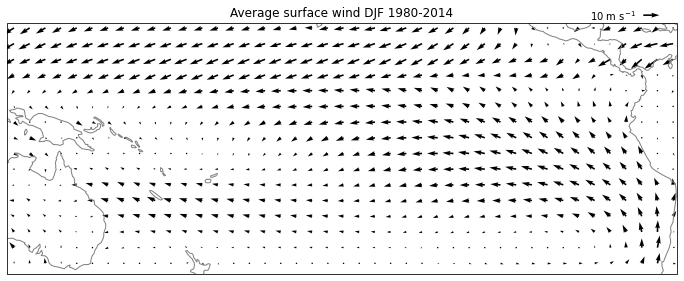

In [4]:
# Separate winter months 
u_djf = dsw.u10.load().where(dsw['time.season'] == 'DJF')
u_djf = u_djf.rolling(min_periods=3, center=True, time=3).mean().groupby('time.year').mean('time')
v_djf = dsw.v10.load().where(dsw['time.season'] == 'DJF')
v_djf = v_djf.rolling(min_periods=3, center=True, time=3).mean().groupby('time.year').mean('time')

# Plot wind yearly averages for all years (1980-2014)
pu = u_djf.mean(dim='year')
pv = v_djf.mean(dim='year')
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=210))
pu, pv = pu[::5,::5], pv[::5,::5] 
qv = ax.quiver(pu.longitude, pu.latitude, pu.values, pv.values, transform=ccrs.PlateCarree())
ax.coastlines(color='grey'); 
ax.set_extent([280, 440, 20, -40], crs=ccrs.PlateCarree(central_longitude=210))
plt.title('Average surface wind DJF 1980-2014')
qk = plt.quiverkey(qv, 0.95, 1.03, 10, '10 m s$^{-1}$', labelpos='W')

### Plot El Nino compared to average climate wind (1980-2014)

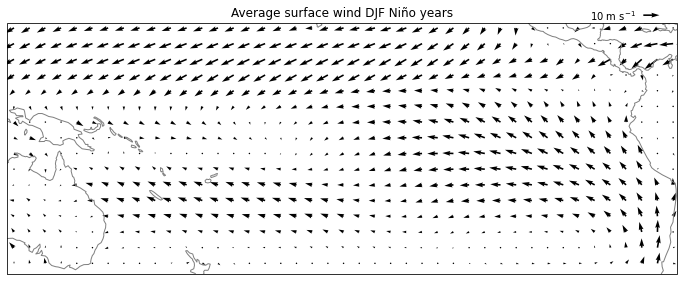

In [5]:
# Plot wind yearly averages for only El Nino years (1980-2014)
pu = u_djf.sel(year=nino_yrs).mean(dim='year')
pv = v_djf.sel(year=nino_yrs).mean(dim='year')
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=210))
pu, pv = pu[::5,::5], pv[::5,::5] 
qv = ax.quiver(pu.longitude, pu.latitude, pu.values, pv.values, transform=ccrs.PlateCarree())
ax.coastlines(color='grey'); 
ax.set_extent([280, 440, 20, -40], crs=ccrs.PlateCarree(central_longitude=210))
plt.title('Average surface wind DJF Niño years')
qk = plt.quiverkey(qv, 0.95, 1.03, 10, '10 m s$^{-1}$', labelpos='W')

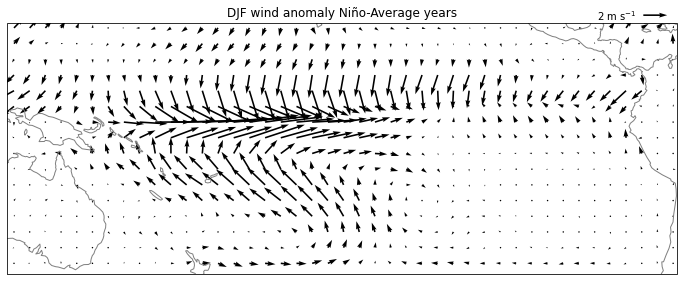

In [6]:
# Plot anomaly between El Nino year and all years (difference between the two)
pu = u_djf.sel(year=nino_yrs).mean(dim='year') - u_djf.mean(dim='year')
pv = v_djf.sel(year=nino_yrs).mean(dim='year') - v_djf.mean(dim='year')
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=210))
pu, pv = pu[::5,::5], pv[::5,::5] 
qv = ax.quiver(pu.longitude, pu.latitude, pu.values, pv.values, transform=ccrs.PlateCarree())
ax.coastlines(color='grey'); 
ax.set_extent([280, 440, 20, -40], crs=ccrs.PlateCarree(central_longitude=210))
plt.title('DJF wind anomaly Niño-Average years')
qk = plt.quiverkey(qv, 0.95, 1.03, 2, '2 m s$^{-1}$', labelpos='W')

### Plot La Nina compared to average climate (1980-2014)

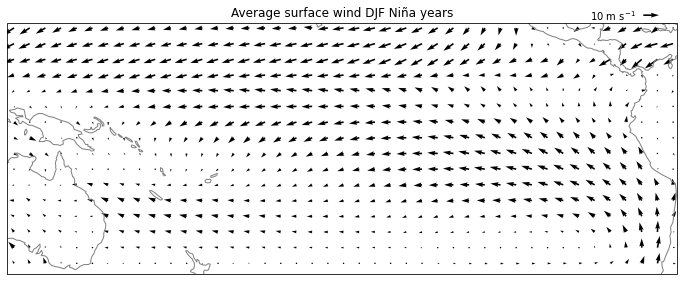

In [7]:
# Plot wind yearly averages for only La Nina years (1980-2014)
pu = u_djf.sel(year=nina_yrs).mean(dim='year')
pv = v_djf.sel(year=nina_yrs).mean(dim='year')
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=210))
pu, pv = pu[::5,::5], pv[::5,::5] 
qv = ax.quiver(pu.longitude, pu.latitude, pu.values, pv.values, transform=ccrs.PlateCarree())
ax.coastlines(color='grey'); 
ax.set_extent([280, 440, 20, -40], crs=ccrs.PlateCarree(central_longitude=210))
plt.title('Average surface wind DJF Niña years')
qk = plt.quiverkey(qv, 0.95, 1.03, 10, '10 m s$^{-1}$', labelpos='W')

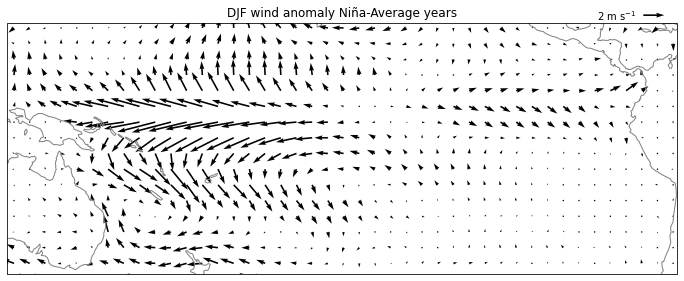

In [8]:
# Plot anomaly between La Nina year and all years (difference between the two)
pu = u_djf.sel(year=nina_yrs).mean(dim='year') - u_djf.mean(dim='year')
pv = v_djf.sel(year=nina_yrs).mean(dim='year') - v_djf.mean(dim='year')
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=210))
pu, pv = pu[::5,::5], pv[::5,::5] 
qv = ax.quiver(pu.longitude, pu.latitude, pu.values, pv.values, transform=ccrs.PlateCarree())
ax.coastlines(color='grey'); 
ax.set_extent([280, 440, 20, -40], crs=ccrs.PlateCarree(central_longitude=210))
plt.title('DJF wind anomaly Niña-Average years')
qk = plt.quiverkey(qv, 0.95, 1.03, 2, '2 m s$^{-1}$', labelpos='W')

### Plot El Nino 1998 compared to average climate (1980-2014)

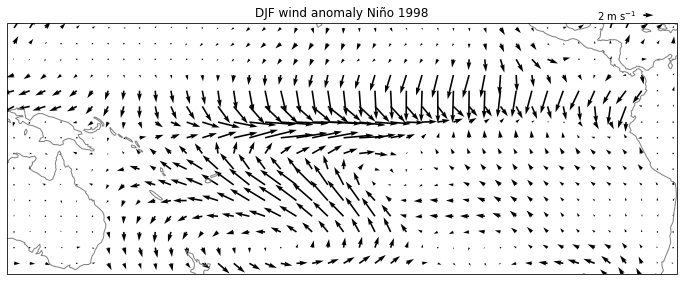

In [9]:
# Plot anomaly between El Nino 1998 and all years (difference between the two)
pu = u_djf.sel(year=Nino98).mean(dim='year') - u_djf.mean(dim='year')
pv = v_djf.sel(year=Nino98).mean(dim='year') - v_djf.mean(dim='year')
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=210))
pu, pv = pu[::5,::5], pv[::5,::5] 
qv = ax.quiver(pu.longitude, pu.latitude, pu.values, pv.values, transform=ccrs.PlateCarree())
ax.coastlines(color='grey'); 
ax.set_extent([280, 440, 20, -40], crs=ccrs.PlateCarree(central_longitude=210))
plt.title('DJF wind anomaly Niño 1998')
qk = plt.quiverkey(qv, 0.95, 1.03, 2, '2 m s$^{-1}$', labelpos='W')

### Plot La Nina 2010-2011 compared to avrage climate (1980-2014)

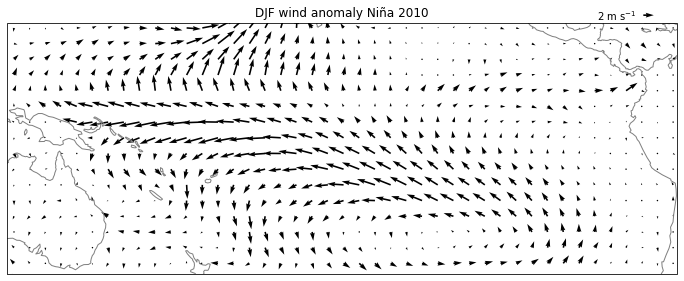

In [10]:
pu = u_djf.sel(year=Nina11).mean(dim='year') - u_djf.mean(dim='year')
pv = v_djf.sel(year=Nina11).mean(dim='year') - v_djf.mean(dim='year')
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=210))
pu, pv = pu[::5,::5], pv[::5,::5] 
qv = ax.quiver(pu.longitude, pu.latitude, pu.values, pv.values, transform=ccrs.PlateCarree())
ax.coastlines(color='grey'); 
ax.set_extent([280, 440, 20, -40], crs=ccrs.PlateCarree(central_longitude=210))
plt.title('DJF wind anomaly Niña 2010')
qk = plt.quiverkey(qv, 0.95, 1.03, 2, '2 m s$^{-1}$', labelpos='W')

# Sea Surface Temperature (by Cecilia Mattedi)

In [11]:
dst = xr.open_dataset(r'C:\Users\ilaca\Desktop\Physic of the Climate System\Project\ERA5_LowRes_Monthly_sst.nc')
sst = dst.sst.load()

In this section plots of sea surface temperature (_sst_) are plotted.  Firs of all we converted all the measurements from K into °C, in order to facilitate the understanding of the plots.

The produced plots are:
1. average sst in DJF for the period 1980-2018;
2. average sst for the most relevant El Nino years
3. sst anomalies for the most relevant El Nino years
4. sst anomalies for a particular El Nino year (1998)
5. average sst for the most relevant La Nina years
6. sst anomalies for the most relevant La Nina years
7. sst anomalies for a particular La Nina year (2011)

### Average sea surface T in DJF for the period 1980-2018

Text(0.5, 1.0, 'Average sea surface temperatures DJF 1980-2018')

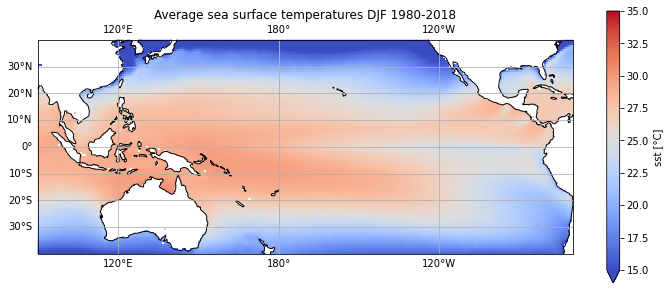

In [12]:
sst_djf = sst.where(dst['time.season'] == 'DJF')
sst_djf1 = sst_djf.rolling(min_periods=3, center=True, time=3).mean()
sst_djf2 = sst_djf1.groupby('time.year').mean('time')
sst_djf3 = sst_djf2.mean('year')

#convert in °C
sst_djf_c=sst_djf3-273.15

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=210))
sst_djf_c.plot(ax=ax, transform=ccrs.PlateCarree(),cmap='coolwarm',vmin=15, vmax=35,cbar_kwargs={'label': 'sst [°C]'})
ax.coastlines(); ax.gridlines(draw_labels=True);
ax.set_extent([240, 440, 40, -40], crs=ccrs.PlateCarree(central_longitude=210))
plt.title('Average sea surface temperatures DJF 1980-2018')

The figure above shows very well the main _Tropical Pacific climatology_. The equatorial Pacific is characterized by easterly trade winds that move surface current westward, with a slight divergent component causing equatorial upwelling.

The _thermocline is sloped_ in the east-west direction, with larger values on the west and smaller values on the east. Thus, upwelling on the east brings to the surface colder water.

### SST averge for the most relevant el Nino years

In [13]:
#sea surface temperatures during el NINO directly converted in °C
sst_NINO_c = sst_djf2.sel(year=nino_yrs).mean('year')-273.15
sst_NINA_c = sst_djf2.sel(year=nina_yrs).mean('year')-273.15

Text(0.5, 1.0, 'DJF sea surface temperatures Niño-average years')

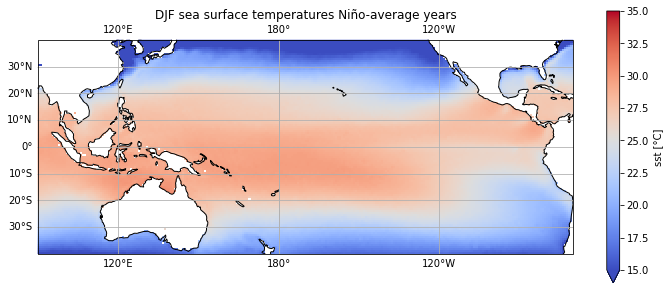

In [14]:
#Plot el NINO sea surface temperatures
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=210))
sst_NINO_c.plot(ax=ax, transform=ccrs.PlateCarree(),cmap='coolwarm',vmin=15, vmax=35,cbar_kwargs={'label': 'sst [°C]'})
ax.coastlines(); ax.gridlines(draw_labels=True);
ax.set_extent([240, 440, 40, -40], crs=ccrs.PlateCarree(central_longitude=210))
plt.title('DJF sea surface temperatures Niño-average years')

### SST anomalies for the most relevat El Nino years

Text(0.5, 1.0, 'DJF sea surface temperature anomaly Niño-Average years')

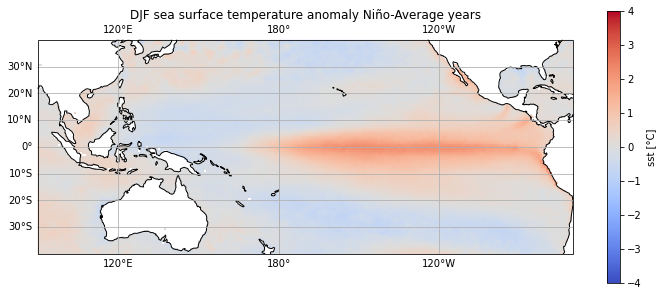

In [15]:
# difference between EL NINO years and average over all years

#calculate the difference
diff_NINO = -sst_djf_c + sst_NINO_c 
#plot
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=210))
diff_NINO.plot(ax=ax, transform=ccrs.PlateCarree(),cmap='coolwarm',cbar_kwargs={'label': 'sst [°C]'},vmin=-4,vmax=4)
ax.coastlines(); ax.gridlines(draw_labels=True);
ax.set_extent([240, 440, 40, -40], crs=ccrs.PlateCarree(central_longitude=210))
plt.title('DJF sea surface temperature anomaly Niño-Average years')

The region with warm sst anomalies is extending in the eastern Pacific and spreads out the precipitation anomalies (in the mean climatology they are more concentrated in the western part). This is a consequence of the weakening of the easterlies, with consequent relaxing of the gradient in the thermocline slope and a warm water upwelling near the American coasts.

### SST anomalies for one relevant El Nino year (1998)

Text(0.5, 1.0, 'DJF sea surface temperature anomaly El Niño 1998')

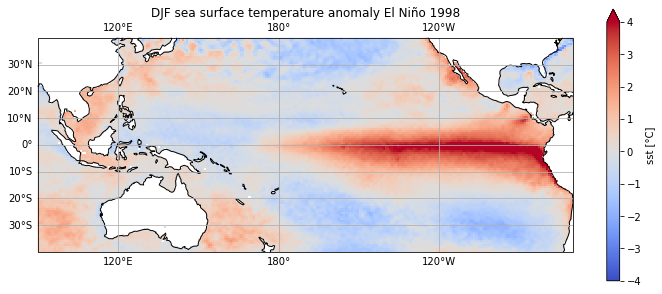

In [16]:
sst_NINO_98 = sst_djf2.sel(year=1998)-273.15
diff_NINO_98 = -sst_djf_c + sst_NINO_98 

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=210))
diff_NINO_98.plot(ax=ax, transform=ccrs.PlateCarree(),cmap='coolwarm',cbar_kwargs={'label': 'sst [°C]'},vmin=-4,vmax=4)
ax.coastlines(); ax.gridlines(draw_labels=True);
ax.set_extent([240, 440, 40, -40], crs=ccrs.PlateCarree(central_longitude=210))
plt.title('DJF sea surface temperature anomaly El Niño 1998')

### SST anomalies for the most relevant La Nina years

Text(0.5, 1.0, 'DJF sea surface temperature anomaly Niña-Average years')

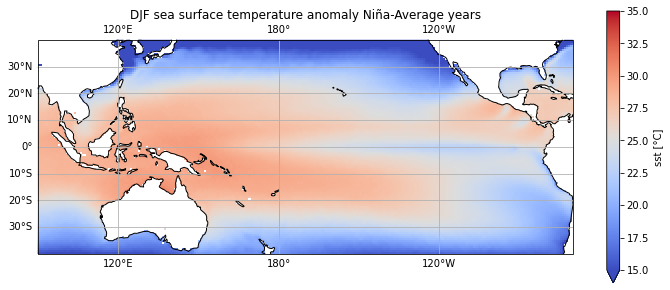

In [17]:
#Plot La NINA sea surface temperatures
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=210))
sst_NINA_c.plot(ax=ax, transform=ccrs.PlateCarree(),cmap='coolwarm',vmin=15, vmax=35,cbar_kwargs={'label': 'sst [°C]'})
ax.coastlines(); ax.gridlines(draw_labels=True);
ax.set_extent([240, 440, 40, -40], crs=ccrs.PlateCarree(central_longitude=210))
plt.title('DJF sea surface temperature anomaly Niña-Average years')

### SST anomalies for the most relevant La Nina years

Text(0.5, 1.0, 'DJF sea surface temperatures anomalies for La NINA years')

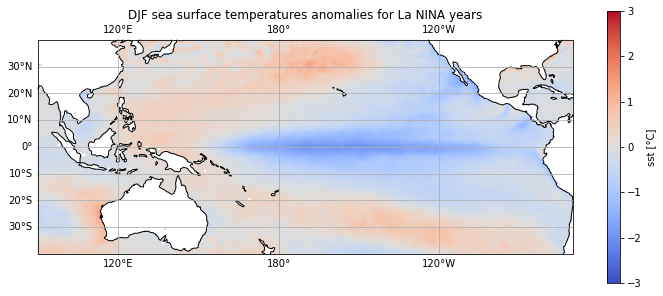

In [18]:
# difference between EL NINO years and average over all years

#calculate the difference
diff_NINA = -sst_djf_c+sst_NINA_c

#plot
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=210))
diff_NINA.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm',cbar_kwargs={'label': 'sst [°C]'},vmin=-3,vmax=3)
ax.coastlines(); ax.gridlines(draw_labels=True);
ax.set_extent([240, 440, 40, -40], crs=ccrs.PlateCarree(central_longitude=210))
plt.title('DJF sea surface temperatures anomalies for La NINA years')

La Nina looks like more extreme climatological conditions: squeezing of precipitation in the western part of the ocean, further sloping up of the thermocline and upwelling of colder water near the american coasts.

### SST anomalies for a relevant La Nina year (2011)

Text(0.5, 1.0, 'DJF sea surface temperatures anomaly La Niña 2011')

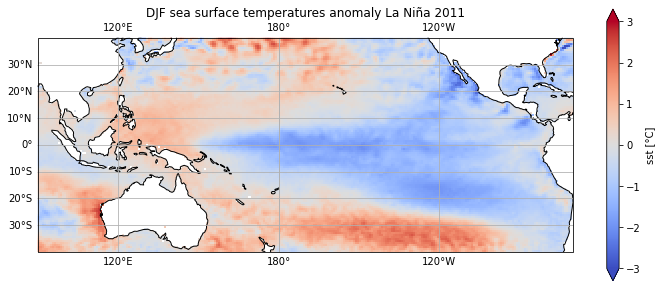

In [19]:
sst_NINA_2011 = sst_djf2.sel(year=2011)-273.15
diff_NINA_2011 = -sst_djf_c + sst_NINA_2011

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=210))
diff_NINA_2011.plot(ax=ax, transform=ccrs.PlateCarree(),cmap='coolwarm',cbar_kwargs={'label': 'sst [°C]'},vmin=-3,vmax=3)
ax.coastlines(); ax.gridlines(draw_labels=True);
ax.set_extent([240, 440, 40, -40], crs=ccrs.PlateCarree(central_longitude=210))
plt.title('DJF sea surface temperatures anomaly La Niña 2011')

# Pressure (by David Kurz)

Dataset of the pressure was the same as for wind, so we will use 'dsw'

### Seasonal averages of the sea surface pressure

In [20]:
# compute monthly average:
slp_ma = dsw.msl.load().groupby('time.month').mean(dim='time')
# compute seasonal averages
slp_sa = dsw.msl.load().groupby('time.season').mean(dim='time')

# This uses a series of tricks to come to the goal
slp_djf = dsw.msl.load().where(dsw['time.season'] == 'DJF')
slp_djf = slp_djf.rolling(min_periods=3, center=True, time=3).mean()
slp_djf = slp_djf.groupby('time.year').mean('time')
slp_djf_mean = slp_djf.sel().mean(dim='year')

Text(0.5, 1.0, 'mean sea level pressure during DJF from 1980 to 2018')

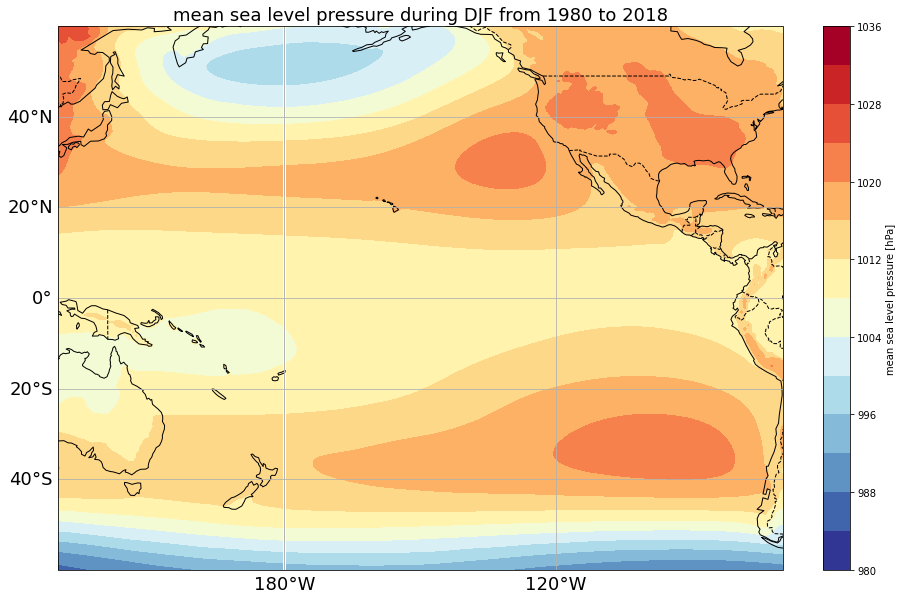

In [21]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18,10),subplot_kw={'projection': ccrs.PlateCarree(central_longitude=210)})
slp_djf_mean = slp_djf_mean / 100
slp_djf_mean.plot.contourf(ax=ax, transform=ccrs.PlateCarree(), cmap='RdYlBu_r',levels=18,
                                cbar_kwargs={'label':'mean sea level pressure [hPa]','fraction': 0.04, 'pad': 0.04})
ax.coastlines(color='black');
xl = ax.gridlines(draw_labels=True);
xl.xlabels_top = False
xl.ylabels_right = False
xl.xformatter = LONGITUDE_FORMATTER
xl.yformatter = LATITUDE_FORMATTER
xl.xlabel_style = {'size': 18, 'color': 'k'}
xl.ylabel_style = {'size': 18, 'color': 'k'}
ax.add_feature(cartopy.feature.BORDERS, linestyle='--')
ax.set_extent([280, 440, 60, -60], crs=ccrs.PlateCarree(central_longitude=210))
ax.set_title('mean sea level pressure during DJF from 1980 to 2018'.format(), fontsize = 18)

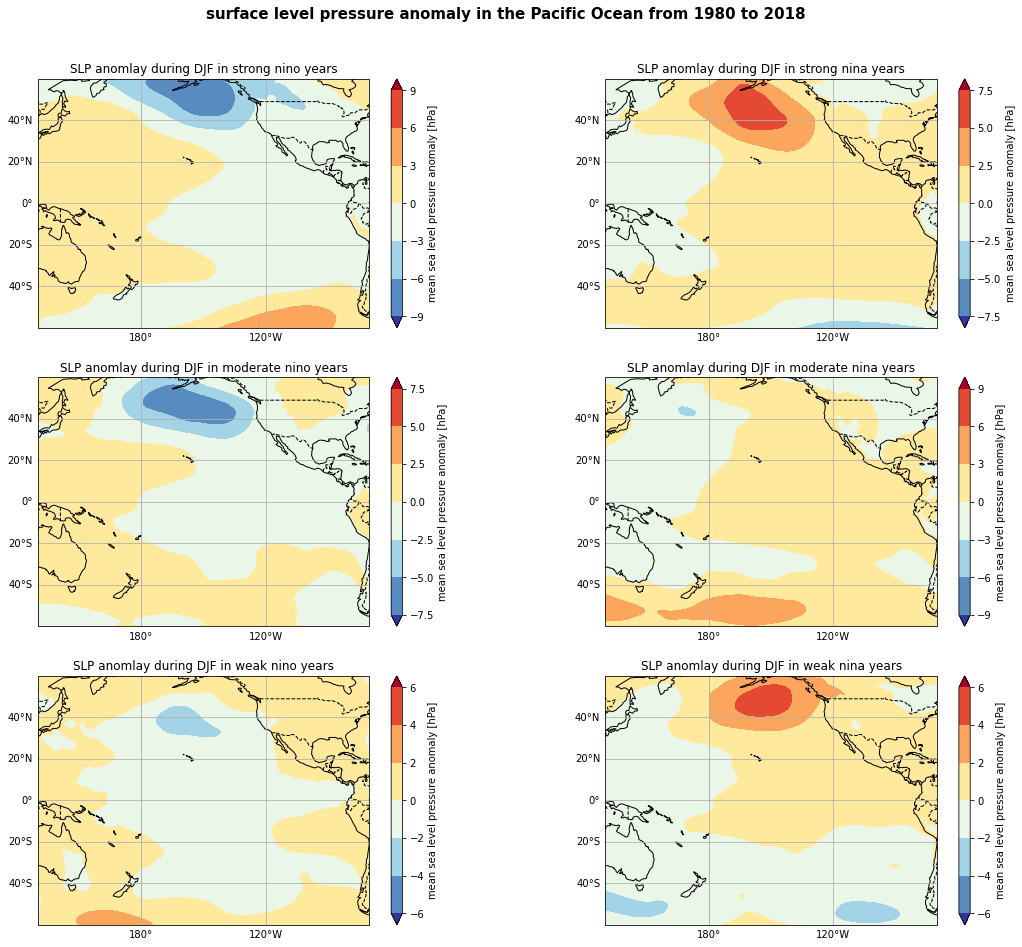

In [22]:
# plot average sea surf pressure over all years (1980 - 2018) in DJF season: 

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18,10),subplot_kw={'projection': ccrs.PlateCarree(central_longitude=210)})
#levels = np.arange(980,1040,2)
enso = ['strong nino years', 'strong nina years', 'moderate nino years',
        'moderate nina years', 'weak nino years', 'weak nina years']
nino = [strong_nino_yrs, strong_nina_yrs, mod_nino_yrs, mod_nina_yrs, weak_nino_yrs, weak_nina_yrs]

i = 0
for x, y in ([0,0], [0,1], [1,0], [1,1], [2,0],[2,1]):
    ax = axes[x,y]
    slp = slp_djf.sel(year=nino[i]).mean(dim='year')
    slp_anom = (slp - slp_djf_mean*100)/100
    slp_anom.plot.contourf(ax=ax, transform=ccrs.PlateCarree(), cmap='RdYlBu_r', #levels=levels,
                  extend='both', cbar_kwargs={'label':'mean sea level pressure anomaly [hPa]'})
    ax.coastlines(color='black');
    xl = ax.gridlines(draw_labels=True);
    xl.xlabels_top = False
    xl.ylabels_right = False
    ax.add_feature(cartopy.feature.BORDERS, linestyle='--')
    ax.set_extent([280, 440, 60, -60], crs=ccrs.PlateCarree(central_longitude=210))
    ax.set_title('SLP anomlay during DJF in {}'.format(enso[i]))

    i += 1

plt.suptitle('surface level pressure anomaly in the Pacific Ocean from 1980 to 2018',fontsize=15, fontweight='bold', y=1.40)
plt.subplots_adjust(top=1.3, wspace = 0.3);

Text(0.5, 1.25, 'Average surface level pressure anomaly over Pacific ocean from 1980 to 2018')

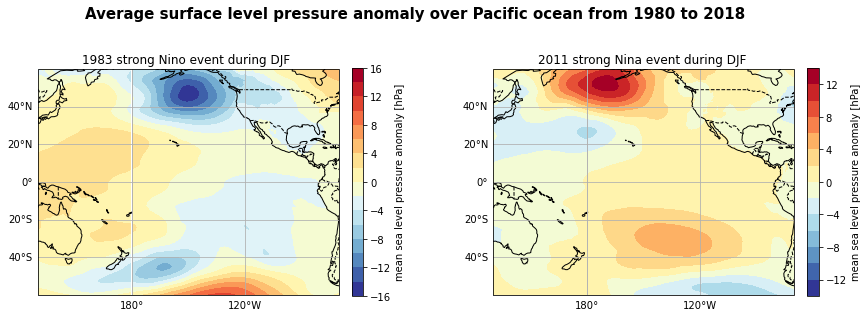

In [23]:
# plot the difference between nina and nino average sea surf pressure; 
strong_nino = [1983]
strong_nina = [2011]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,5),subplot_kw={'projection': ccrs.PlateCarree(central_longitude=210)})
#levels = np.arange(980,1040,2)
enso_diff = ['1983 strong Nino', '2011 strong Nina']
nino_diff = [strong_nino, strong_nina]


i = 0
for x in (0,1):
    ax = axes[x]
    slp_nino = slp_djf.sel(year=nino_diff[i]).mean(dim='year')
    slp_diff = (slp_nino - slp_djf_mean*100) / 100
    slp_diff.plot.contourf(ax=ax, transform=ccrs.PlateCarree(), cmap='RdYlBu_r', levels=18,
                           cbar_kwargs={'label':'mean sea level pressure anomaly [hPa]','fraction': 0.035, 'pad': 0.04})
    ax.coastlines(color='black');
    xl = ax.gridlines(draw_labels=True);
    xl.xlabels_top = False
    xl.ylabels_right = False
    ax.add_feature(cartopy.feature.BORDERS, linestyle='--')
    ax.set_extent([280, 440, 60, -60], crs=ccrs.PlateCarree(central_longitude=210))
    ax.set_title('{} event during DJF '.format(enso_diff[i]))
    i += 1

plt.subplots_adjust(top=1.4, wspace = 0.4);
plt.suptitle('Average surface level pressure anomaly over Pacific ocean from 1980 to 2018',fontsize=15, fontweight='bold', y=1.25)

# Precipitation (by Ilaria Carcereri)

In [24]:
# Dataset for the precipitation
dsp = xr.open_dataset('C:/Users/ilaca/Desktop/Physic of the Climate System/Project/ERA5_LowRes_Monthly_tp.nc')

### Precipitation during neutral years

Text(0.5, 1.0, 'Average precipitation in winter month, ERA5 1979-2018')

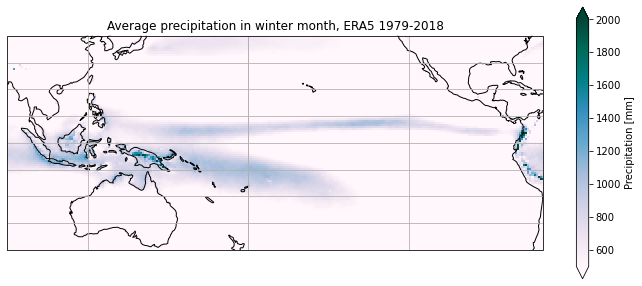

In [25]:
# This uses a series of tricks to come to the goal
prec_djf1 = dsp.tp.load().where(dsp['time.season'] == 'DJF')*1000*90 # average climate winter month in m(*1000) per 3 month(90 days)
prec_djf2 = prec_djf1.rolling(min_periods=3, center=True, time=3).mean()
prec_djf3 = prec_djf2.groupby('time.year').mean('time')
prec_djf4 = prec_djf3.mean('year')

# Plot the total average precipitation during neutral years
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=210))
prec_djf4.plot(ax=ax, transform=ccrs.PlateCarree(),cbar_kwargs={'label':'Precipitation [mm]'},cmap='PuBuGn',vmin=500,vmax=2000) 
ax.coastlines(); ax.gridlines(); 
ax.set_extent([240, 440, 40, -40], crs=ccrs.PlateCarree(central_longitude=210))
ax.set_title('Average precipitation in winter month, ERA5 1979-2018')

### Precipitation during El Nino years

Text(0.5, 1.0, 'Average precipitation in winter month during El Nino years')

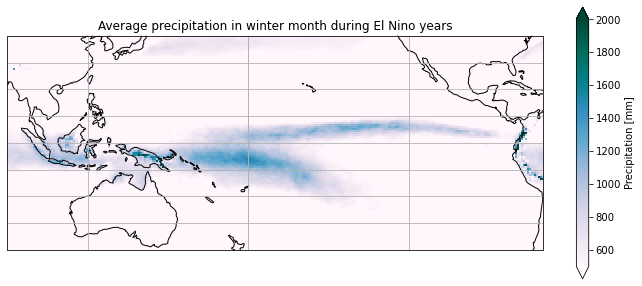

In [26]:
# Precipitation during El Nino
prec_nino = prec_djf3.sel(year=nino_yrs).mean(dim='year')

# Plot of El Nino
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=210))
prec_nino.plot(ax=ax, transform=ccrs.PlateCarree(),cbar_kwargs={'label':'Precipitation [mm]'},cmap='PuBuGn',vmin=500,vmax=2000) 
ax.coastlines(); ax.gridlines(); 
ax.set_extent([240, 440, 40, -40], crs=ccrs.PlateCarree(central_longitude=210))
ax.set_title('Average precipitation in winter month during El Nino years')

### Difference between El Nino and neutral years

Text(0.5, 1.0, 'Difference between El Nino and neutral years precipitation')

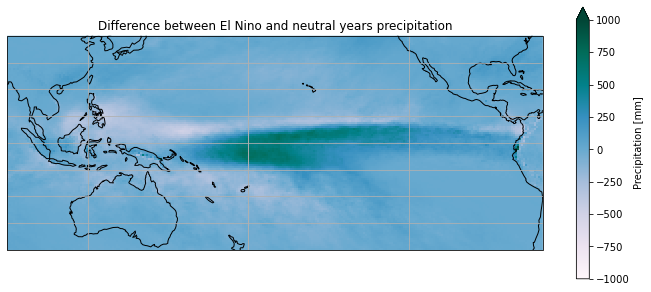

In [27]:
# Difference between El Nino and neutral years
diff_nino = prec_nino - prec_djf4

# Plot of the difference
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=210))
diff_nino.plot(ax=ax, transform=ccrs.PlateCarree(),cbar_kwargs={'label':'Precipitation [mm]'},cmap='PuBuGn',vmin=-1000,vmax=1000) 
ax.coastlines(); ax.gridlines(); 
ax.set_extent([240, 440, 40, -40], crs=ccrs.PlateCarree(central_longitude=210))
ax.set_title('Difference between El Nino and neutral years precipitation')

### Precipitation during La Nina years

Text(0.5, 1.0, 'Average precipitation in winter month during La Nina years')

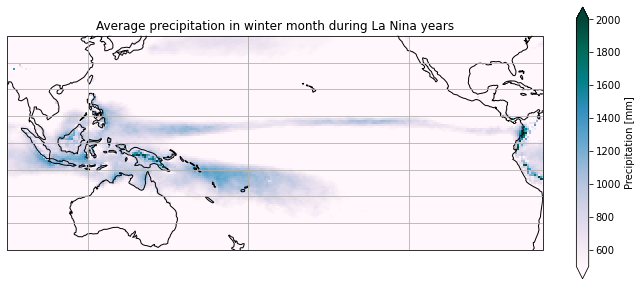

In [28]:
# Precipitation during La Nina
prec_nina = prec_djf3.sel(year=nina_yrs).mean(dim='year')

# Plot of El Nino
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=210))
prec_nina.plot(ax=ax, transform=ccrs.PlateCarree(),cbar_kwargs={'label':'Precipitation [mm]'},cmap='PuBuGn',vmin=500,vmax=2000) 
ax.coastlines(); ax.gridlines(); 
ax.set_extent([240, 440, 40, -40], crs=ccrs.PlateCarree(central_longitude=210))
ax.set_title('Average precipitation in winter month during La Nina years')

### Difference between La Nina and neutral years

Text(0.5, 1.0, 'Difference between La Nina and neutral years precipitation')

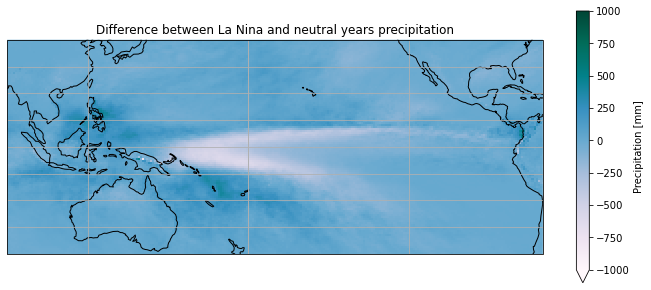

In [29]:
# Difference between La Nina and neutral years
diff_nina = prec_nina - prec_djf4

# Plot of the difference
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=210))
diff_nina.plot(ax=ax, transform=ccrs.PlateCarree(),cbar_kwargs={'label':'Precipitation [mm]'},cmap='PuBuGn',vmin=-1000,vmax=1000) 
ax.coastlines(); ax.gridlines(); 
ax.set_extent([240, 440, 40, -40], crs=ccrs.PlateCarree(central_longitude=210))
ax.set_title('Difference between La Nina and neutral years precipitation')

### Precipitation anomaly El Nino 1998

Text(0.5, 1.0, 'Precipitation anomaly El Nino 1998')

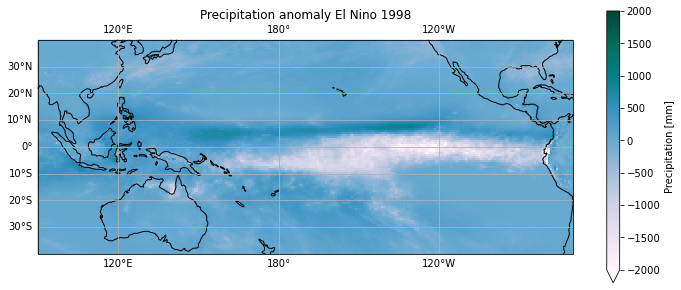

In [30]:
prec_nino98 = prec_djf3.sel(year=1998)
diff_nino98 = prec_djf4 - prec_nino98

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=210))
diff_nino98.plot(ax=ax, transform=ccrs.PlateCarree(),cbar_kwargs={'label':'Precipitation [mm]'},cmap='PuBuGn',vmin=-2000,vmax=2000)
ax.coastlines(); ax.gridlines(draw_labels=True);
ax.set_extent([240, 440, 40, -40], crs=ccrs.PlateCarree(central_longitude=210))
plt.title('Precipitation anomaly El Nino 1998')

### Precipitation anomaly La Nina 2011

Text(0.5, 1.0, 'Precipitation anomaly La Nina 1998')

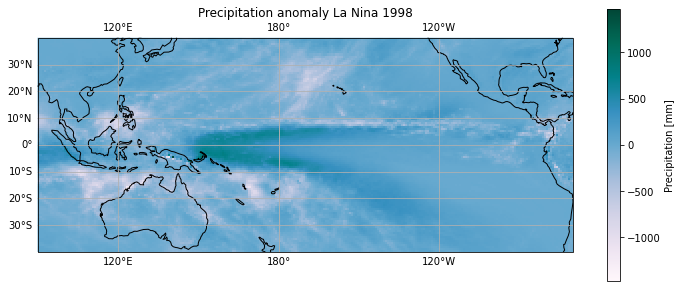

In [31]:
prec_nina11 = prec_djf3.sel(year=2011)
diff_nina11 = prec_djf4 - prec_nina11

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=210))
diff_nina11.plot(ax=ax, transform=ccrs.PlateCarree(),cbar_kwargs={'label':'Precipitation [mm]'},cmap='PuBuGn')
ax.coastlines(); ax.gridlines(draw_labels=True);
ax.set_extent([240, 440, 40, -40], crs=ccrs.PlateCarree(central_longitude=210))
plt.title('Precipitation anomaly La Nina 1998')

# Evaporation (by Beatrice Diana)

In [32]:
## Upload data about moisture
dsm=xr.open_dataset('C:/Users/ilaca/Desktop/Physic of the Climate System/Project/ERA5_LowRes_Monthly_evap.nc')

Text(0.5, 1.0, 'Annual average evaporation in [mm], ERA5 1979-2018')

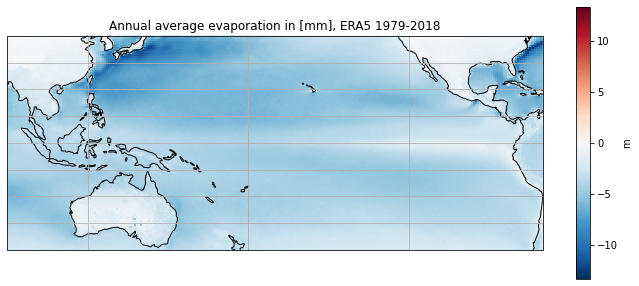

In [33]:
# This uses a series of tricks to come to the goal
evap_djf = dsm.e.load().where(dsm['time.season'] == 'DJF')
evap_djf_ = evap_djf.rolling(min_periods=3, center=True, time=3).mean()
evap_djf__ = evap_djf_.groupby('time.year').mean('time')
evap_djf___=evap_djf__.mean('year')
evap_djf___=evap_djf___*1000
# Plot the total averages
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=210))
evap_djf___.plot(ax=ax, transform=ccrs.PlateCarree(),cbar_kwargs={'label':'m'})
ax.coastlines(); ax.gridlines();
ax.set_extent([240, 440, 40, -40], crs=ccrs.PlateCarree(central_longitude=210))
ax.set_title('Annual average evaporation in [mm], ERA5 1979-2018')

In [34]:
evaporation_nino = evap_djf__.sel(year=nino_yrs).mean(dim='year')
evaporation_nino=evaporation_nino*1000

Text(0.5, 1.0, 'Annual average evaporation during El Nino years [mm], ERA5 1979-2018')

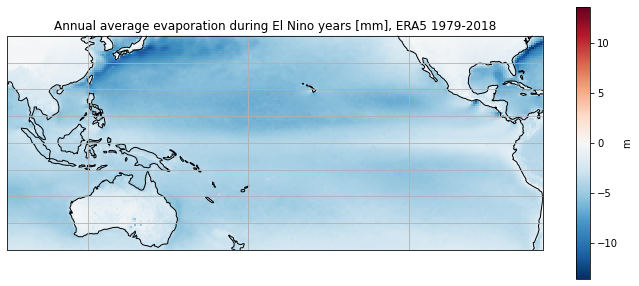

In [35]:
# Plot the el nino
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=210))
evaporation_nino.plot(ax=ax, transform=ccrs.PlateCarree(),cbar_kwargs={'label':'m'})
ax.coastlines(); ax.gridlines();
ax.set_extent([240, 440, 40, -40], crs=ccrs.PlateCarree(central_longitude=210))
ax.set_title('Annual average evaporation during El Nino years [mm], ERA5 1979-2018')

In [36]:
# Annual average during La Nina
evaporation_nina = evap_djf__.sel(year=nina_yrs).mean(dim='year')*1000

Text(0.5, 1.0, 'Annual average evaporation during La Nina years [mm], ERA5 1979-2018')

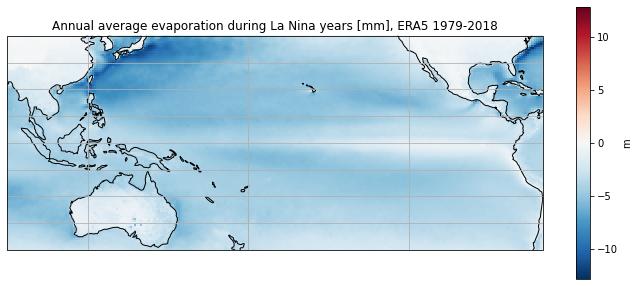

In [37]:
# Plot the la nina
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=210))
evaporation_nina.plot(ax=ax, transform=ccrs.PlateCarree(),cbar_kwargs={'label':'m'})
ax.coastlines(); ax.gridlines();
ax.set_extent([240, 440, 40, -40], crs=ccrs.PlateCarree(central_longitude=210))
ax.set_title('Annual average evaporation during La Nina years [mm], ERA5 1979-2018')

Text(0.5, 1.0, 'Difference evaporation during El Nino years [m], ERA5 1979-2018')

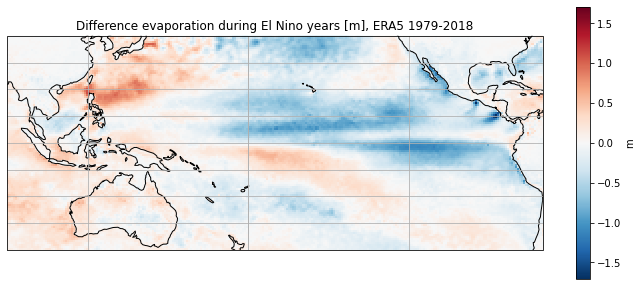

In [38]:
difference_elnino= evaporation_nino-evap_djf___

# Plotting the difference
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=210))
ax.set_extent([240, 440, 40, -40], crs=ccrs.PlateCarree(central_longitude=210))
difference_elnino.plot(ax=ax, transform=ccrs.PlateCarree(),cbar_kwargs={'label':'m'})
ax.coastlines(); ax.gridlines();
ax.set_title('Difference evaporation during El Nino years [m], ERA5 1979-2018')

Text(0.5, 1.0, 'Difference evaporation during La Nina years [m], ERA5 1979-2018')

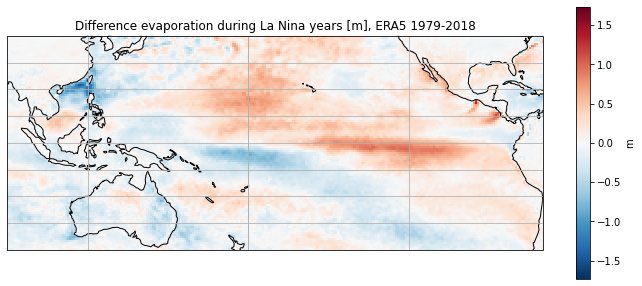

In [39]:
difference_lanina= evaporation_nina-evap_djf___

# Plotting the difference
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=210))
ax.set_extent([240, 440, 40, -40], crs=ccrs.PlateCarree(central_longitude=210))
difference_lanina.plot(ax=ax, transform=ccrs.PlateCarree(),cbar_kwargs={'label':'m'})
ax.coastlines(); ax.gridlines();
ax.set_title('Difference evaporation during La Nina years [m], ERA5 1979-2018')

### El Nino in 97/98

In [40]:
evaporation_nino97 = evap_djf__.sel(year=1997)
evaporation_nino97=evaporation_nino97*1000-evap_djf___

Text(0.5, 1.0, 'Evaporation during El Nino (1997-1998) [m], ERA5 1979-2018')

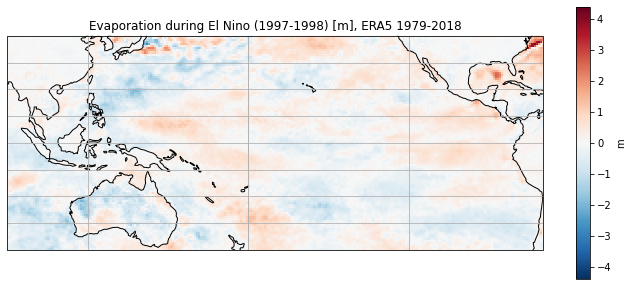

In [41]:
# Plotting el nino 1997 1998

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=210))
ax.set_extent([240, 440, 40, -40], crs=ccrs.PlateCarree(central_longitude=210))
evaporation_nino97.plot(ax=ax, transform=ccrs.PlateCarree(),cbar_kwargs={'label':'m'})
ax.coastlines(); ax.gridlines();
ax.set_title('Evaporation during El Nino (1997-1998) [m], ERA5 1979-2018')

### La Nina in 2010-2011

In [42]:
evaporation_nina10 = evap_djf__.sel(year=2010)
evaporation_nina10=evaporation_nina10*1000-evap_djf___

Text(0.5, 1.0, 'Evaporation during El Nino (1997-1998) [m], ERA5 1979-2018')

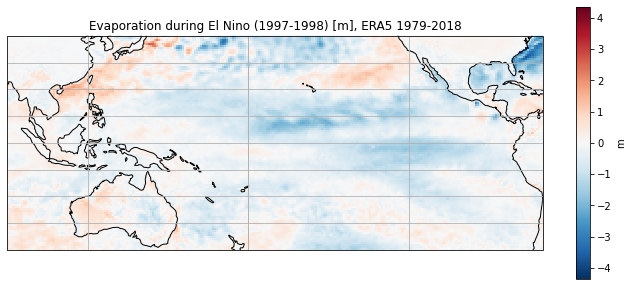

In [43]:
# Plotting la nina 2011
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=210))
ax.set_extent([240, 440, 40, -40], crs=ccrs.PlateCarree(central_longitude=210))
evaporation_nina10.plot(ax=ax, transform=ccrs.PlateCarree(),cbar_kwargs={'label':'m'})
ax.coastlines(); ax.gridlines();
ax.set_title('Evaporation during El Nino (1997-1998) [m], ERA5 1979-2018')

# SOI Index (by David Kurz)

In [44]:
# Sea Level Pressure  (SLP) data from http://www.cpc.ncep.noaa.gov/data/indices/
import itertools as it

darwin = pd.read_csv('C:/Users/ilaca/Desktop/Physic of the Climate System/Project/DarwinSeaLevelPressure_stand.csv')
#darwin = darwin.T
#darwin = darwin.stack()
#darwin = darwin.transpose()
#darwin.to_csv('DarwinSeaLevelPressure_stand.csv')
time = pd.to_datetime(darwin.YEAR.astype(str) + '-' + darwin.MONTH.astype(str))
darwin = xr.DataArray(darwin.VALUE, dims='time', coords={'time':time})
#print(darwin)
# Apply a 3-month smoothing window
darwin = darwin.rolling(time=3, min_periods=3, center=True).mean()


tahiti = pd.read_csv('C:/Users/ilaca/Desktop/Physic of the Climate System/Project/TahitiSeaLevelPressure_stand.csv')
#tahiti = tahiti.transpose()
#tahiti = tahiti.stack()
#tahiti.to_csv('TahitiSeaLevelPressure_stand.csv')
time = pd.to_datetime(tahiti.YEAR.astype(str) + '-' + tahiti.MONTH.astype(str))
tahiti = xr.DataArray(tahiti.VALUE, dims='time', coords={'time':time})

# Apply a 3-month smoothing window
tahiti = tahiti.rolling(time=3, min_periods=3, center=True).mean()


eastpac = pd.read_csv('C:/Users/ilaca/Desktop/Physic of the Climate System/Project/repac_slpa.csv')
#eastpac = eastpac.transpose()
#eastpac = eastpac.stack()
#eastpac.to_csv('repac_slpa.csv')
time = pd.to_datetime(eastpac.YEAR.astype(str) + '-' + eastpac.MONTH.astype(str))
eastpac = xr.DataArray(eastpac.VALUE, dims='time', coords={'time':time})

# Apply a 3-month smoothing window
eastpac = eastpac.rolling(time=3, min_periods=3, center=True).mean()


indo = pd.read_csv('C:/Users/ilaca/Desktop/Physic of the Climate System/Project/rindo_slpa.csv')
#indo = indo.transpose()
#indo = indo.stack()
#indo.to_csv('rindo_slpa.csv')
time = pd.to_datetime(indo.YEAR.astype(str) + '-' + indo.MONTH.astype(str))
indo = xr.DataArray(indo.VALUE, dims='time', coords={'time':time})

# Apply a 3-month smoothing window
indo = indo.rolling(time=3, min_periods=3, center=True).mean()


eqatsoi = pd.read_csv('C:/Users/ilaca/Desktop/Physic of the Climate System/Project/reqsoi.csv')
#eqatsoi = eqatsoi.transpose()
#eqatsoi = eqatsoi.stack()
#eqatsoi.to_csv('reqsoi.csv')
time = pd.to_datetime(eqatsoi.YEAR.astype(str) + '-' + eqatsoi.MONTH.astype(str))
eqatsoi = xr.DataArray(eqatsoi.VALUE, dims='time', coords={'time':time})

# Apply a 3-month smoothing window
eqatsoi = eqatsoi.rolling(time=3, min_periods=3, center=True).mean()


RSOI = pd.read_csv('C:/Users/ilaca/Desktop/Physic of the Climate System/Project/rsoi.csv')
#RSOI = RSOI.transpose()
#RSOI = RSOI.stack()
#RSOI.to_csv('rsoi.csv')
time = pd.to_datetime(RSOI.YEAR.astype(str) + '-' + RSOI.MONTH.astype(str))
RSOI = xr.DataArray(RSOI.VALUE, dims='time', coords={'time':time})

# Apply a 3-month smoothing window
RSOI = RSOI.rolling(time=3, min_periods=3, center=True).mean()


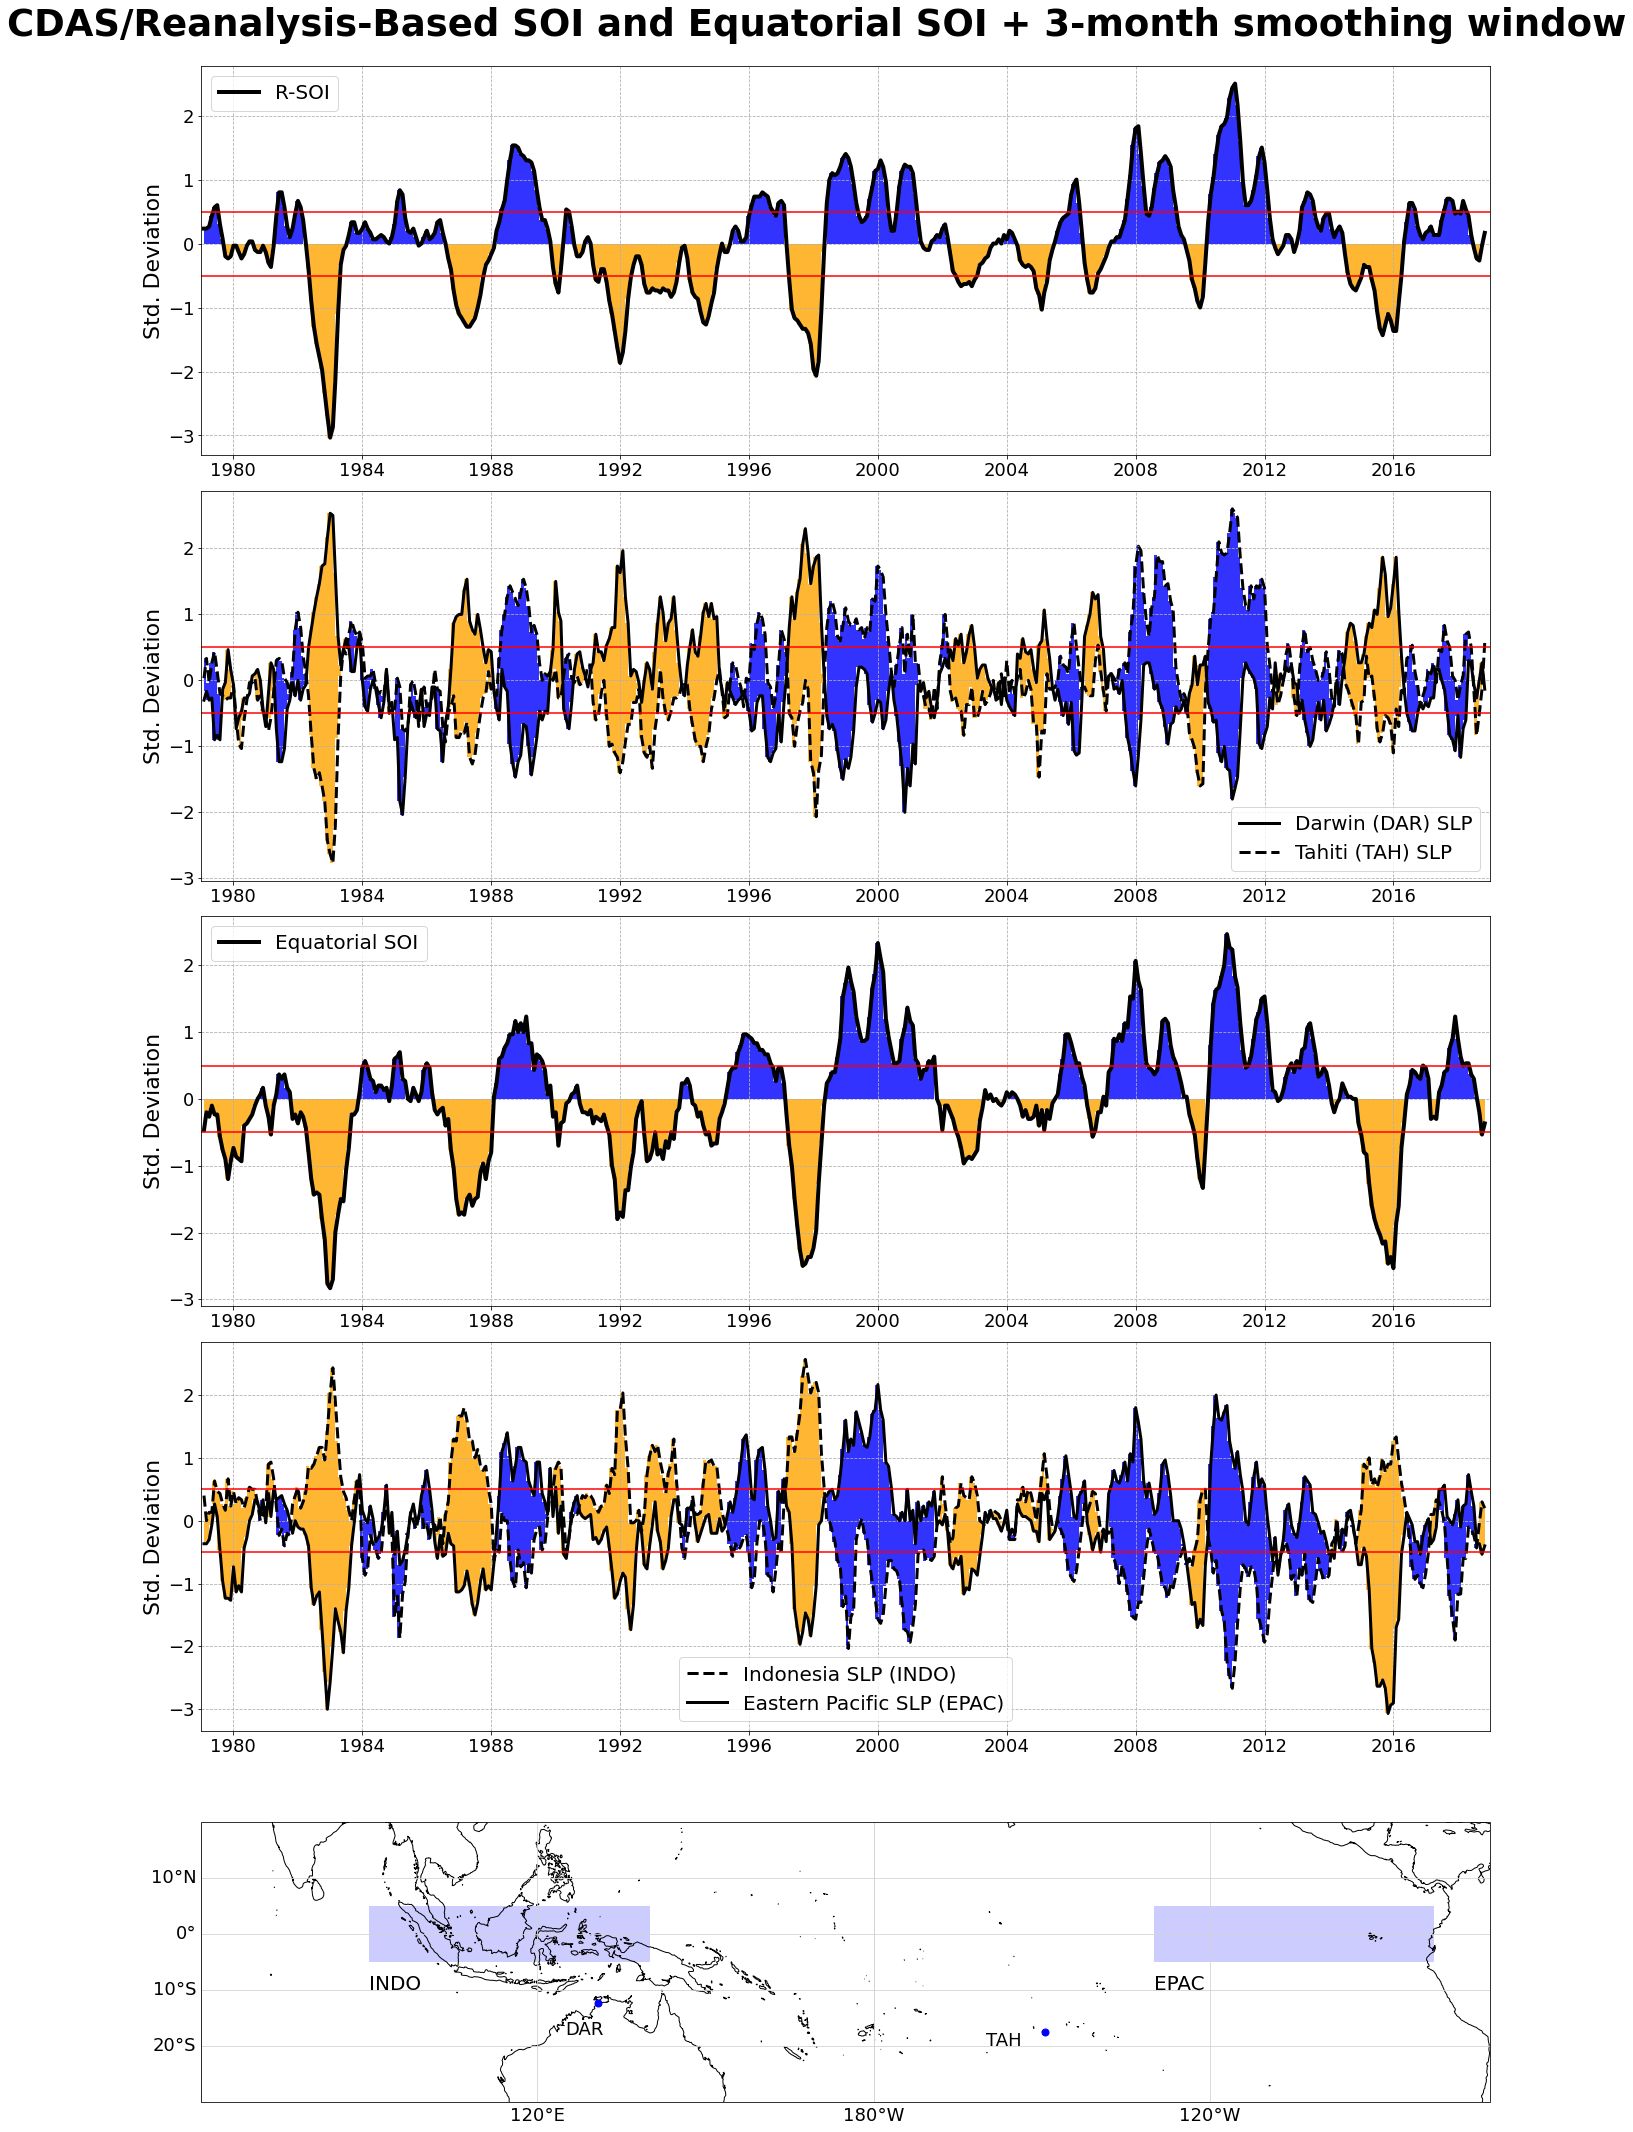

In [45]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.patches as mpatches

plt.figure(figsize=[19,30])
plt.suptitle('CDAS/Reanalysis-Based SOI and Equatorial SOI + 3-month smoothing window', fontsize=37, fontweight='bold', y = 1.00005)

# plot the subplots
# Plot1: 
plt.subplot(5,1,1)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)
plt.plot(time,RSOI, 'black', linewidth = 4);
plt.fill_between(time, RSOI, where = RSOI < 0, step="pre", facecolor = 'orange', alpha=0.8)
plt.fill_between(time, RSOI, where = RSOI > 0, step="pre", facecolor = 'blue', alpha=0.8)
plt.legend(["R-SOI"], loc="upper left", fontsize = 20)
plt.grid(linestyle='--')
plt.ylabel('Std. Deviation', fontsize = 22)
plt.axhline(y = 0.5, color = 'r', linestyle = '-')
plt.axhline(y = -0.5, color = 'r', linestyle = '-')
plt.xlim(['1979-01-01','2018-12-31'])


# plot2: 
plt.subplot(5,1,2)
plt.plot(time,darwin, 'black', linewidth = 3);
plt.plot(time,tahiti, '--k', linewidth = 3);
plt.fill_between(time, darwin, tahiti, where = darwin < tahiti, step="pre", facecolor = 'blue', alpha=0.8)
plt.fill_between(time, darwin, tahiti, where = darwin > tahiti, step="pre", facecolor = 'orange', alpha=0.8)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)
plt.legend(['Darwin (DAR) SLP','Tahiti (TAH) SLP'], loc = "best", fontsize = 20)
plt.grid(linestyle='--')
plt.ylabel('Std. Deviation', fontsize = 22)
plt.axhline(y = 0.5, color = 'r', linestyle = '-')
plt.axhline(y = -0.5, color = 'r', linestyle = '-')
plt.xlim(['1979-01-01','2018-12-31'])


# plot3: 
plt.subplot(5,1,3)
plt.plot(time,eqatsoi, 'k', linewidth = 4)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.fill_between(time, eqatsoi, where = eqatsoi < 0, step="pre", facecolor = 'orange', alpha=0.8)
plt.fill_between(time, eqatsoi, where = eqatsoi > 0, step="pre", facecolor = 'blue', alpha=0.8)
plt.legend(['Equatorial SOI'], loc="upper left", fontsize = 20)
plt.grid(linestyle='--')
plt.ylabel('Std. Deviation', fontsize = 22)
plt.axhline(y = 0.5, color = 'r', linestyle = '-')
plt.axhline(y = -0.5, color = 'r', linestyle = '-')
plt.xlim(['1979-01-01','2018-12-31'])


#plot4: 
plt.subplot(5,1,4)
plt.plot(time,indo,'--k', linewidth = 3);
plt.plot(time,eastpac, 'k', linewidth = 3);
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.fill_between(time, indo, eastpac, where = indo < eastpac, step="pre", facecolor = 'blue', alpha=0.8)
plt.fill_between(time, indo, eastpac, where = indo > eastpac, step="pre", facecolor = 'orange', alpha=0.8)
plt.legend(['Indonesia SLP (INDO)','Eastern Pacific SLP (EPAC)'], loc="best", fontsize = 20)
plt.grid(linestyle='--')
plt.ylabel('Std. Deviation', fontsize = 22)
plt.axhline(y = 0.5, color = 'r', linestyle = '-')
plt.axhline(y = -0.5, color = 'r', linestyle = '-')
plt.xlim(['1979-01-01','2018-12-31'])


# plot5: 
ax1 = plt.subplot(5,1,5,projection=ccrs.PlateCarree(central_longitude=180))
ax1.set_extent([-120, 110, 20, -30], crs=ccrs.PlateCarree(central_longitude=180))
ax1.coastlines(resolution='auto', color='k')
# mark a known place to help us geo-locate ourselves
ax1.plot(-149.4499, -17.63, 'bo', markersize=7, transform=ccrs.Geodetic())
ax1.text(-160, -20, 'TAH', transform=ccrs.Geodetic(), fontsize=18)
ax1.plot(130.844441, -12.438056, 'bo', markersize=7, transform=ccrs.Geodetic())
ax1.text(125, -18, 'DAR', transform=ccrs.Geodetic(), fontsize=18)
ax1.add_patch(mpatches.Rectangle(xy=[90, -5], width=50, height=10,facecolor='blue', alpha=0.2, transform=ccrs.PlateCarree()))
ax1.text(90, -10, 'INDO', transform=ccrs.Geodetic(), fontsize=20)
ax1.add_patch(mpatches.Rectangle(xy=[-130, -5], width=50, height=10,facecolor='blue', alpha=0.2, transform=ccrs.PlateCarree()))
ax1.text(-130, -10, 'EPAC', transform=ccrs.Geodetic(), fontsize=20)
g1 = ax1.gridlines(color='lightgrey', linestyle='-', draw_labels=True)
g1.xlabels_top = False
g1.xformatter = LONGITUDE_FORMATTER
g1.yformatter = LATITUDE_FORMATTER
g1.xlabel_style = {'size': 18, 'color': 'k'}
g1.ylabel_style = {'size': 18, 'color': 'k'}


plt.tight_layout()
plt.show()

### Composites

In [46]:
ninos = pd.read_csv('C:/Users/ilaca/Desktop/Physic of the Climate System/Project/SST-Ninos.csv',delim_whitespace = True)
time = pd.to_datetime(ninos.YR.astype(str) + '-' + ninos.MON.astype(str))
nino12 = xr.DataArray(ninos.ANOM12, dims='time', coords={'time':time})
nino3 = xr.DataArray(ninos.ANOM3, dims='time', coords={'time':time})
nino4 = xr.DataArray(ninos.ANOM4, dims='time', coords={'time':time})
nino34 = xr.DataArray(ninos.ANOM34, dims='time', coords={'time':time})
# Apply a 3-month smoothing window
nino12 = nino12.rolling(time=3, min_periods=3, center=True).mean()
nino3 = nino3.rolling(time=3, min_periods=3, center=True).mean()
nino4 = nino4.rolling(time=3, min_periods=3, center=True).mean()
nino34 = nino34.rolling(time=3, min_periods=3, center=True).mean()

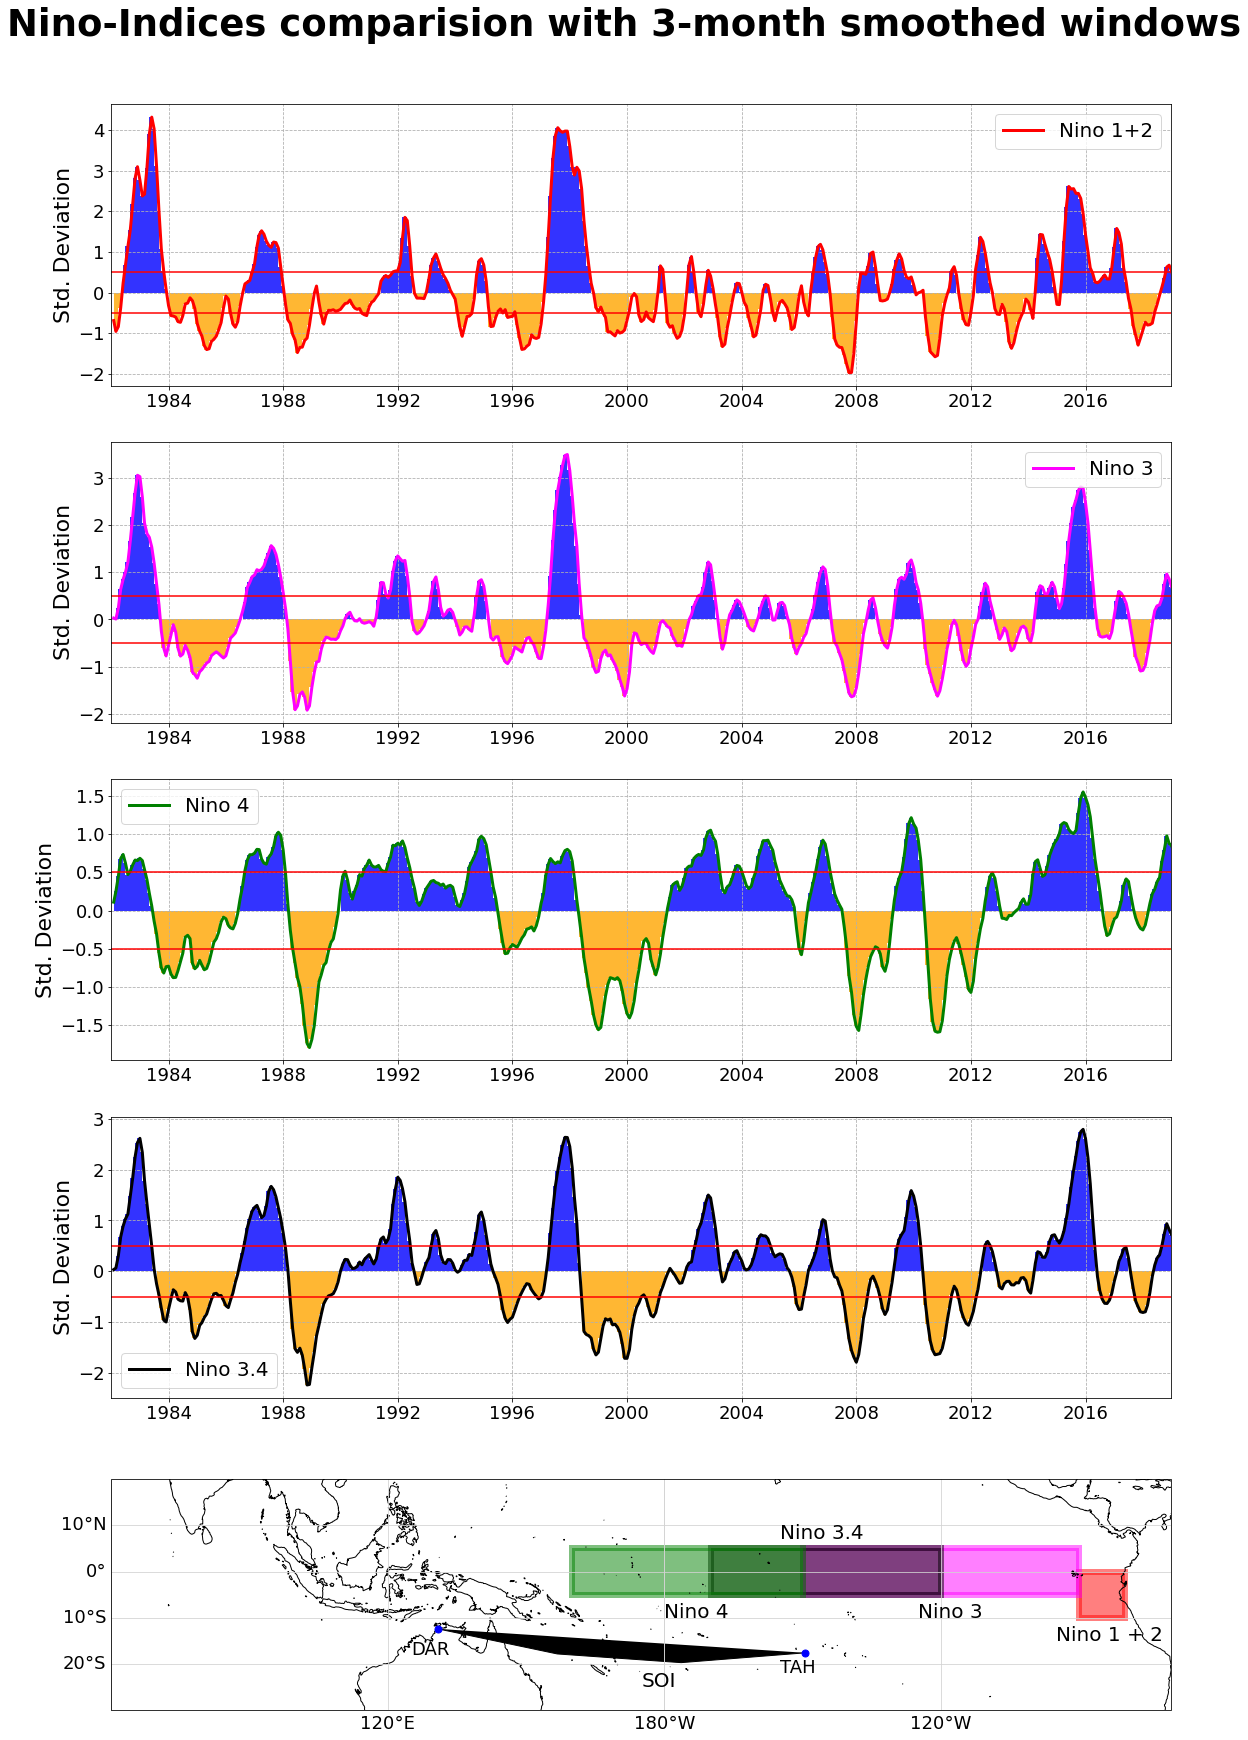

In [47]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.patches as mpatches
import matplotlib.path as mpath

Path = mpath.Path

plt.figure(figsize=[19,30])
plt.suptitle('Nino-Indices comparision with 3-month smoothed windows', fontsize=37, fontweight='bold', y = 0.925)


# plt1: 
plt.subplot(5,1,1)
plt.plot(time,nino12, 'r', linewidth = 3);
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(['Nino 1+2'], loc="best", fontsize = 20)
plt.grid(linestyle='--')
plt.ylabel('Std. Deviation', fontsize = 22)
plt.axhline(y = 0.5, color = 'r', linestyle = '-')
plt.axhline(y = -0.5, color = 'r', linestyle = '-')
plt.fill_between(time,nino12, where = nino12 < 0, step="pre", facecolor = 'orange', alpha=0.8)
plt.fill_between(time,nino12, where = nino12 > 0, step="pre", facecolor = 'blue', alpha=0.8)
plt.xlim(['1982-01-01','2018-12-31'])



# plt2: 
plt.subplot(5,1,2)
plt.plot(time,nino3, 'magenta', linewidth = 3);
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(['Nino 3'], loc="best", fontsize = 20)
plt.grid(linestyle='--')
plt.ylabel('Std. Deviation', fontsize = 22)
plt.axhline(y = 0.5, color = 'r', linestyle = '-')
plt.axhline(y = -0.5, color = 'r', linestyle = '-')
plt.fill_between(time,nino3, where = nino3 < 0, step="pre", facecolor = 'orange', alpha=0.8)
plt.fill_between(time,nino3, where = nino3 > 0, step="pre", facecolor = 'blue', alpha=0.8)
plt.xlim(['1982-01-01','2018-12-31'])



# plt3: 
plt.subplot(5,1,3)
plt.plot(time,nino4, 'g', linewidth = 3);
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(['Nino 4'], loc="best", fontsize = 20)
plt.grid(linestyle='--')
plt.ylabel('Std. Deviation', fontsize = 22)
plt.axhline(y = 0.5, color = 'r', linestyle = '-')
plt.axhline(y = -0.5, color = 'r', linestyle = '-')
plt.fill_between(time,nino4, where = nino4 < 0, step="pre", facecolor = 'orange', alpha=0.8)
plt.fill_between(time,nino4, where = nino4 > 0, step="pre", facecolor = 'blue', alpha=0.8)
plt.xlim(['1982-01-01','2018-12-31'])


# plt4: 
plt.subplot(5,1,4)
plt.plot(time,nino34, 'k', linewidth = 3);
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(['Nino 3.4'], loc="best", fontsize = 20)
plt.grid(linestyle='--')
plt.ylabel('Std. Deviation', fontsize = 22)
plt.axhline(y = 0.5, color = 'r', linestyle = '-')
plt.axhline(y = -0.5, color = 'r', linestyle = '-')
plt.fill_between(time,nino34, where = nino34 < 0, step="pre", facecolor = 'orange', alpha=0.8)
plt.fill_between(time,nino34, where = nino34 > 0, step="pre", facecolor = 'blue', alpha=0.8)
plt.xlim(['1982-01-01','2018-12-31'])


# plt5: 
ax1 = plt.subplot(5,1,5,projection=ccrs.PlateCarree(central_longitude=180))
ax1.set_extent([-120, 110, 20, -30], crs=ccrs.PlateCarree(central_longitude=180))
ax1.coastlines(resolution='auto', color='k')
# mark a known place to help us geo-locate ourselves
ax1.plot(-149.4499, -17.63, 'bo', markersize=7, transform=ccrs.Geodetic())
ax1.text(-155, -22, 'TAH', transform=ccrs.Geodetic(), fontsize=18)
ax1.plot(130.844441, -12.438056, 'bo', markersize=7, transform=ccrs.Geodetic())
ax1.text(125, -18, 'DAR', transform=ccrs.Geodetic(), fontsize=18)
ax1.text(175, -25, 'SOI', transform=ccrs.Geodetic(), fontsize=20)
ax1.add_patch(mpatches.PathPatch(Path([(-149.4499, -17.639), (130.844441, -12.438056)], [Path.MOVETO,Path.LINETO]),facecolor='k', transform=ccrs.Geodetic()))
ax1.add_patch(mpatches.Rectangle(xy=[-90, -10], width=10, height=10, facecolor='r',edgecolor='r',lw=6, alpha=0.5, transform=ccrs.PlateCarree()))
ax1.text(-95, -15, 'Nino 1 + 2', transform=ccrs.Geodetic(), fontsize=20)
ax1.add_patch(mpatches.Rectangle(xy=[-150, -5], width=60, height=10, facecolor='magenta',edgecolor='magenta', lw=6, alpha=0.5, transform=ccrs.PlateCarree()))
ax1.text(-125, -10, 'Nino 3', transform=ccrs.Geodetic(), fontsize=20)
ax1.add_patch(mpatches.Rectangle(xy=[-170, -5], width=50, height=10, facecolor='k',edgecolor='k', lw=6 ,alpha=0.5, transform=ccrs.PlateCarree()))
ax1.text(-155, 7, 'Nino 3.4', transform=ccrs.Geodetic(), fontsize=20)
ax1.add_patch(mpatches.Rectangle(xy=[160, -5], width=50, height=10, facecolor='g',edgecolor='g', lw=6, alpha=0.5, transform=ccrs.PlateCarree()))
ax1.text(180, -10, 'Nino 4', transform=ccrs.Geodetic(), fontsize=20)
g1 = ax1.gridlines(color='lightgrey', linestyle='-', draw_labels=True)
g1.xlabels_top = False
g1.xformatter = LONGITUDE_FORMATTER
g1.yformatter = LATITUDE_FORMATTER
g1.xlabel_style = {'size': 18, 'color': 'k'}
g1.ylabel_style = {'size': 18, 'color': 'k'}

### Correlation coefficient of annual SLP with SLP at Darwin

In [48]:
ds = xr.open_dataset('C:/Users/ilaca/Desktop/Physic of the Climate System/Project/ERA5_LowRes_Monthly_t2m.nc')

In [49]:
# new data file, available on OLAT or on the scratch directory
ds = xr.open_dataset('C:/Users/ilaca/Desktop/Physic of the Climate System/Project/ERA5_LowRes_Monthly_uvslp.nc')

In [50]:
# compute the annual average
slp = ds.msl.load().resample(time='AS').mean(dim='time') / 100.
# take the SLP at Darwin
slp_da = slp.sel(latitude=-12.45, longitude=130, method='nearest')

In [51]:
# make an empty array that we will fill
cor_map = slp.isel(time=0) * 0.
# loop over lats and lons
for j in np.arange(len(ds.latitude)):
    for i in np.arange(len(ds.longitude)):
        # we use the .values attribute because this is much faster
        cor_map.values[j, i] = np.corrcoef(slp.values[:, j, i], slp_da.values)[0, 1]

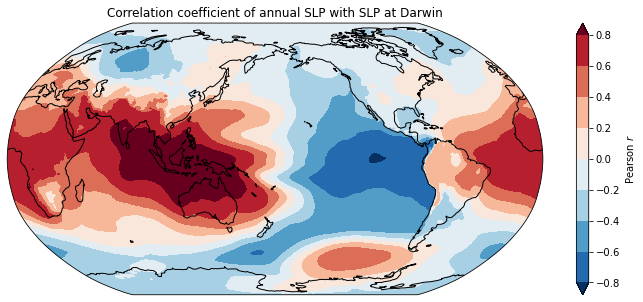

In [52]:
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-180))
cor_map.plot.contourf(ax=ax, transform=ccrs.PlateCarree(), levels=np.linspace(-0.8, 0.8, 9), 
                      extend='both', cbar_kwargs={'label':'Pearson $r$'});
ax.coastlines(); ax.set_global();
plt.title('Correlation coefficient of annual SLP with SLP at Darwin');